In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib


In [2]:
import time
import sys
# !pip install tensorflow
# import pickle
# import tensorflow as tf
#  UpSampling2D, BatchNormalization
sys.path.insert(0,'../..')
from gp2 import Runner

In [3]:
!locate gp2


/lib/modules/5.4.0-105-generic/kernel/drivers/iio/light/gp2ap020a00f.ko
/lib/modules/5.4.0-105-generic/kernel/drivers/input/misc/gp2ap002a00f.ko
/lib/modules/5.4.0-110-generic/kernel/drivers/iio/light/gp2ap020a00f.ko
/lib/modules/5.4.0-110-generic/kernel/drivers/input/misc/gp2ap002a00f.ko
/lib/modules/5.4.0-42-generic/kernel/drivers/iio/light/gp2ap020a00f.ko
/lib/modules/5.4.0-42-generic/kernel/drivers/input/misc/gp2ap002a00f.ko
/lib/modules/5.4.0-64-generic/kernel/drivers/iio/light/gp2ap020a00f.ko
/lib/modules/5.4.0-64-generic/kernel/drivers/input/misc/gp2ap002a00f.ko
/raid/alphafold_data/pdb_mmcif/mmcif_files/1gp2.cif
/raid/alphafold_data/pdb_mmcif/mmcif_files/3gp2.cif
/raid/alphafold_data/pdb_mmcif/mmcif_files/4gp2.cif
/raid/alphafold_data/pdb_mmcif/mmcif_files/6gp2.cif
/raid/mpsych/gp2_lucchi_augmented_images.npy
/raid/mpsych/gp2_lucchi_augmented_images_plus.npy
/raid/mpsych/gp2_lucchi_augmented_images_plus2.npy
/raid/mpsych/gp2_lucchi_augmented_masks.npy
/raid/mpsych/gp2_lucchi_au

In [4]:

R = Runner(verbose=True)

*** GP2 ***
Working directory: /tmp/tmpy04hy3gaGP2
Verbose mode active!


In [5]:
# load our larger toy dataset (10k images and masks)
images = np.load('/hpcstor6/scratch01/y/y.shah001/Forest Segmented/Forest Segmented/Forest_final_img.npy')
masks = np.load('/hpcstor6/scratch01/y/y.shah001/Forest Segmented/Forest Segmented/Forest_final_mask.npy')

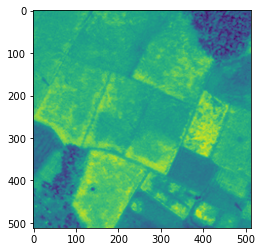

In [6]:
plt.imshow(images[500])

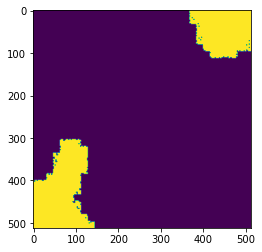

In [7]:
plt.imshow(masks[500])

In [8]:
len(images)

5108

In [9]:
weights = {
    'A': 0.5,
    'A_train': 0.1,
    'A_val': 0.3,
    'A_test': 0.6,
    'B': 0.3,
    'B_train': 0.7,
    'B_val': 0.1,
    'B_test': 0.2,
    'Z': 0.2
}

In [10]:
#
#
R.setup_data(images, masks, dataset_size=5018, weights=weights)

Weights OK!


In [11]:
RUNS = 5

In [12]:
for run in range(RUNS):
    print('***')
    print('RUN:', run)
    t0 = time.time()
    R.run_classifier()
    R.run_discriminator()
    R.find_machine_labels()
    R.relabel()
    print('TOOK', time.time()-t0, 'seconds')
    

***
RUN: 0
Epoch 1/100
4/4 [==============================] - 30s 5s/step - loss: 1.0465 - dice_coeff: 0.6171 - val_loss: 1.1365 - val_dice_coeff: 0.5573
Epoch 2/100
4/4 [==============================] - 6s 2s/step - loss: 0.9475 - dice_coeff: 0.6568 - val_loss: 1.1339 - val_dice_coeff: 0.5585
Epoch 3/100
4/4 [==============================] - 6s 2s/step - loss: 0.9008 - dice_coeff: 0.6759 - val_loss: 1.1325 - val_dice_coeff: 0.5593
Epoch 4/100
4/4 [==============================] - 6s 2s/step - loss: 0.8572 - dice_coeff: 0.6919 - val_loss: 1.1357 - val_dice_coeff: 0.5578
Epoch 5/100
4/4 [==============================] - 6s 2s/step - loss: 0.8144 - dice_coeff: 0.7089 - val_loss: 1.1418 - val_dice_coeff: 0.5549
Epoch 6/100
4/4 [==============================] - 6s 2s/step - loss: 0.8043 - dice_coeff: 0.7138 - val_loss: 1.1437 - val_dice_coeff: 0.5543
Epoch 7/100
4/4 [==============================] - 6s 2s/step - loss: 0.8201 - dice_coeff: 0.7139 - val_loss: 1.1510 - val_dice_coeff: 0

Replacing 48 from 146 !
D_relabeled_ 48
selected_ids ['bfe61e67-2381-4c2b-b689-d5e03ea46224', '7c03c7d9-23bf-4038-9e5a-6e1748995b19', '92304170-a7d6-412c-9507-d92110987a7b', 'f2a0fb8a-760f-4690-a094-be86bd86af45', 'b6ce827c-d568-42c6-af19-0ff5bb2c151c', '60c89977-fc68-4300-b583-382bb4584064', 'd4f4dd9c-3e15-4e4e-b252-f15fcffe037e', '31606a06-bf99-4b03-995d-5c0f0a000537', '2bb7820d-7d98-43fa-8cd8-a94950dc4b35', '6eb95c70-6914-4837-be4f-0b3c52e766d0', 'ec880f4b-5715-4df0-83f5-5fd96feac5f8', '82e3e428-e908-444d-bd3a-0a94e824dcda', 'cb46f510-2955-4f8b-a411-076a39a7d624', '19f36707-e945-434d-b95d-89d36f769d68', '5bf3e1e0-ca26-4c99-8f82-22f6474fd1b1', '2fb41e7d-50d2-4215-929b-e9edb1b16031', '48ed119d-d80e-4fe0-9a20-60e57f20cf84', '1db91b2c-286c-4e78-bf58-3413dc8a3b0e', 'ab8198d8-7d63-4c9f-ad89-5dbaae03639b', 'bf1472a5-e3fe-4fe7-b97d-31a1b34a71fd', 'fda3d3f9-23e4-42ac-924e-56c56076a4f7', '8ed6b2e7-1cce-4d7d-b416-3b2a096e354a', '44ea7fe8-c7e5-4f2f-b673-96c091ab10b8', 'a2765b06-cedd-4389-836c-d

Replacing 50 from 152 !
D_relabeled_ 50
selected_ids ['15ce5c86-e99d-4594-ba00-214d9651f4b2', '8700ca63-b5e8-4a10-932e-efa8e6f5d9e9', '02874620-1073-4e3c-8da5-b47796084624', '9d287e10-8b27-4712-a78e-2e1497f048d5', '0bae7e5f-ac7a-427d-9fac-f4189fc8d589', '8cdc5c3d-93ca-4cb7-965e-44d9c6e56cd0', '03e573ee-b92a-48f2-8892-0f02cc86e868', '09d044d7-6447-49c2-9193-505bc13dff3d', 'c802a80c-4030-480d-9569-662371922bb3', '2eaa6424-16ff-4bd9-a06d-6e917cf2346e', 'fb6ae0e6-f616-4b35-bc41-e7b629dffd98', '49926f3f-342a-4876-ba3b-9bc28def22bb', 'a1499792-b249-4038-ad46-5e8f725d49ae', '4ee00764-9fbf-4678-8e06-a2b33c17963a', 'bc162541-58f8-4cdb-a7ca-8020a22cee41', 'f018e57a-fad7-4a49-82c4-09e12ae3e221', 'bfbb730a-d1b0-4ebb-9e7b-e1e63ea1527d', 'b47912d4-58d3-406f-85fa-7f681e6b8fd7', '660dee22-251a-42fc-8cd3-5a9e75b3214a', '2adf05fc-2b40-4f08-9da6-4b58d8448ab5', 'ebd53277-fe2d-4ca5-916c-f65ce9711f05', 'f6feca7b-e09e-49ae-b811-95f30b93ebb1', '1b2bf1e5-9e32-4d31-bcbd-d6ec7f82aca1', 'bf486e6e-58ba-44d8-b910-e

Replacing 49 from 149 !
D_relabeled_ 49
selected_ids ['5c862311-41a7-4d0f-88ff-b175bc222e28', '2ab24123-c8a5-49df-9d9d-3944c0132d97', '6f64e870-bd1c-4e98-8152-48f6d8503b35', '39331783-9ae4-47d3-93be-d3d422b3d1d2', '80e75c02-9340-4bb9-b487-53f57a3bda34', '524194ff-6882-49af-af7c-f7918385d094', '8b073a8e-0471-4094-8fb0-982a53074557', '76895c17-0707-4d72-96be-aad4d12434bb', 'a5920573-a60c-4543-98be-63cde80f00ab', '2cff24f6-c0c8-4494-b999-12e31ac5b4f5', 'df8bd93e-e873-496d-a81a-bb56b4a073cc', '18c51191-ec0a-4bae-b389-74171bc8673e', 'd79d3437-ee3d-4eb2-8e05-439b70c9a0da', '953f1e43-0b0b-4781-8527-d1e40a90bd4c', '039b6971-0f2d-4ee3-a934-a150d8ce5caf', '6e37069e-3117-45cf-a1d9-4ff4c4b9cad8', 'a90bed20-8da0-4d5c-8c86-98db6dc0fb6d', 'a6e2787b-52c7-4ec0-baaa-7a62bba74140', '2ed6e9b7-3ba3-407e-905f-8dba9579d5ab', '3af2ef48-8385-44a2-a14f-a242d24809d8', '3ba44dee-9bf2-4c7b-93d3-44eae5a45e26', '1c03cdd1-cc56-40bf-9058-810e5f9eb382', 'dfb93964-60c9-4003-aae1-78be88472c27', '0c69337c-e512-4769-a2b1-e

D_relabeled_ 46
selected_ids ['a420f679-4596-460f-bb18-d3fc692cd418', '45359ac8-c546-4c43-b726-55fa8f6db32b', 'fc4b914d-17ce-4c9f-bdb4-49d5e37f1e21', 'e323ba84-90b2-4037-aeaa-0b123ce79ee1', '7c483ead-d17d-4ddc-928c-becd616c84ac', 'efa92f9f-8a58-403c-8617-1bdf63806b98', '06d242e9-c298-4b45-823f-23e4a972fba4', '64142083-0164-46b2-9efe-f51cc124b6c1', 'cd72d35d-1bff-4d38-8049-1e0c376a6062', '1c36938b-4b99-4ac8-b678-d6ef0114344d', '2c2f68bf-51e7-4a46-823c-cc5b64b584b0', 'd94ba487-3640-45be-a25f-71103659d1db', 'faba747a-01fe-4f8f-b9d0-2f4ea3dae03d', '2a6ab37a-1476-4a52-a0f8-f332620fa65d', '3d49e0c3-e172-4124-b204-ef1b25569cbd', '47bf9b3f-4e13-4525-bdf2-547f5684e499', '9df59370-9148-4a93-b7dc-a9efaabea459', '9d5d99c2-6f4b-45b4-8b38-396cd980bec2', 'de5b59d4-0422-41e7-9eb7-1cb896e0eae4', 'a2a561b5-4f3b-47d0-af64-492547e415a9', '4a672ab3-b087-4ee3-bdd4-d4070e8a50fc', '9b97968b-7fb0-47bb-9e50-02488c102b1d', '6b2ff6cf-3679-42e3-bbdc-a11eacb7956e', '6a69e502-3043-4a63-a9f1-f83dc0ed229c', '3a8bd031-

D_relabeled_ 46
selected_ids ['fae8fa28-c6a5-4140-ab77-3f3035f4d758', 'c256009f-cc96-4983-bfd5-e44a5539d703', 'a6b0f81d-1f9c-4477-b679-3d80a1ee0e9d', '7e42b90d-0193-47d1-ae0d-22f95e6eb2ab', '217b1d5e-412e-49e0-b8be-d4156231a537', '0ad82d86-4d80-48a9-b765-cd3bee0bff1d', 'e3675ef0-4661-4e99-9cec-00c7a0c82448', '346d5199-e532-45a3-a1fc-bfced4d59589', '8176b219-e1af-4105-b294-d5b7f91f256d', 'dec1a6aa-a037-4d37-a6e7-8f04507917e7', '637afc95-19c6-43e2-8e43-8f1b99c0412e', 'f3b92e3e-a6d2-40fd-89ab-bcfdddc0a5b8', '0d1d34a3-b60d-4be4-96ec-048c01a6ca64', 'd8c156ef-f4ef-41a5-8fca-208709593bc4', 'f30cd3ec-4aad-4aa6-b4cd-68183a577cd6', 'eb1d2a33-3cd3-471d-91a2-504fe7e26349', '3c839a85-0c24-4a52-810c-2f0d0f0aace3', '962a4fe6-c4b8-49d7-a22a-fe42d26f0be2', '6051317a-aee0-4e99-ac32-2ee95a39b1fd', '75e7130a-05b0-4f92-b24f-76abd40e67ef', '7a887318-0518-4439-9eea-04bf95ffed86', '2e793e00-65c5-438c-acb5-b87e783bd9a6', 'b07bb728-9ab9-446e-ada4-6c3599f20b40', 'bc80f21e-ed78-43d8-8dcb-6ef2d9b5a3dc', '0a1861bc-

In [13]:
R.classifier_scores

[[1.837890625, 0.2878674566745758],
 [2.2842695713043213, 0.18141841888427734],
 [2.8242557048797607, 0.09680858999490738],
 [3.0440938472747803, 0.07267188280820847],
 [3.1550748348236084, 0.06338047981262207]]

In [14]:
R.discriminator_scores

[[0.001029985141940415, 1.0], [0.0, 1.0], [0.0, 1.0], [0.0, 1.0], [0.0, 1.0]]

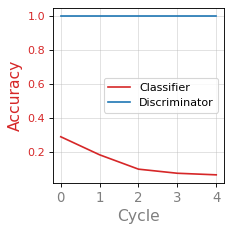

In [15]:
R.plot()